In [3]:
import scvelo as scv
import cellrank as cr

In [4]:
adata = cr.datasets.pancreas_preprocessed("../example.h5ad")
adata

  0%|          | 0.00/140M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2531 × 2000
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'diffmap_evals', 'iroot', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 

In [5]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
k

<ipython-input-5-c740f092645e>:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  k = cr.tl.transition_matrix(


((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))

In [6]:
k.compute_projection(basis="umap")

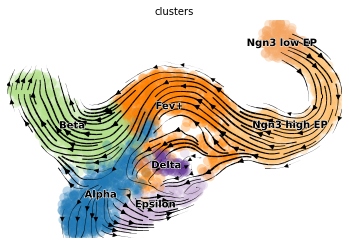

In [7]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap")